# 사람이 말하는 단어를 인공지능 모델로 구분해보자

# 평가 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

## 평가문항	상세기준
1. 음성데이터를 2차원 Spectrogram 으로 변환하여 데이터셋을 구성하였다. : 스펙트로그램 시각화 및 train/test 데이터셋 구성이 정상진행되었다.
2. 1,2차원 데이터를 처리하는 음성인식 모델이 정상 작동한다. : 스펙트로그램을 입력받은 모델이 학습과정에서 안정적으로 수렴하며, evaluation/test 단계를 무리없이 진행가능하다.
3. 테스트셋 수행결과 음성인식 모델의 Accuracy가 일정 수준에 도달하였다. : evaluation 결과 75% 이상의 정확도를 달성하는 모델이 하나 이상 존재한다.


# 음성과 오디오 데이터

## 파동으로서의 소리

- 소리는 진동으로 인한 공기의 압축을 이야기하며, 압축이 얼마나됬느냐는 파동(Wave)로 말할 수 있습니다. 소리에서 얻을 수 있는 물리량은 기본적으로 진폭(Amplitude)와 주파수(Frequency)그리고 위상(Phase)의 3요소로 나타낼 수 있다.

- 물리적 음향에서는 intensity를 소리 진폭의 세기로 정의하고, Frequency는 소리 떨림의 빠르기 그리고 Tone-Color는 소리 파동의 모양으로 정의합니다. 심리적 음향에서는 Loudness는 소리의 크기를 말하고, Pitch는 음정, 소리의 높낮이, 진동수를 의미합니다. 마지막으로 Timbre는 음색 소리 감각등을 나타냅니다.

![title](E-23-04.png)

- 위 그림을 살펴봅시다. 첫번째 줄이 보여주는 것은 주파수(frequency)에 따라 소리의 높이가 달라진다는 것입니다. 두번째 줄은 진폭(Amplitude)에 따라 소리의 세기(크기)가 달라진다는 것을 보여줍니다. 위 두 줄은 주파수 또는 진폭만 달라졌을 뿐, 그래프의 기본 모양은 동일한 것들이었습니다. 그러나 세번째 줄은 아예 그래프의 모양 자체가 다른 것입니다. 이 때는 음정, 음색 등 소리의 맵시가 달라지게 됩니다.

## 주파수는 무엇일까요?

- 주파수는 the number of compressed이고 단위는 Hz를 사용합니다. 1Hz는 1초에 한번 진동한다는 것을 의미합니다. 
- 주기(period)는 파동이 한 번 진동하는데 걸리는 시간, 또는 그 길이를 말하며, 일반적으로는 sin함수의 주기는 2π/ω입니다. 주파수는 1초동안의 진동 횟수입니다.

![title](E-23-05.max-800x600.png)

- 소리의 높낮이는 음원의 주파수에 의해 결정됩니다. 주파수가 높으면 높은 소리가 나고, 낮으면 낮은 소리가 납니다.

## 복합파(Complex Wave)란 무엇일까?

- 우리가 사용하는 대부분의 소리들은 복합파입니다. 서로다른 주파수를 가진 수많은 소리가 뒤섞여 만들어지는 복합파는, 복수의 서로 다른 정현파(sine wave)들의 합으로 이루어진 파형입니다. 수식으로 표현하자면 아래와 같습니다. 이른바 오디오 데이터의 제너럴한 수식 표현이라고 할 수 있습니다.

![title](Complex_Wave.png)

# 오디오 데이터의 디지털화

- 위에서 언급한 오디오 데이터는 아날로그 데이터로서의 소리에 대한 설명이었습니다. 그러나 컴퓨터는 0과 1로만 이루어진 디지털 데이터만 취급 가능합니다. 우리가 흔히 볼 수 있는 소리들은 컴퓨터의 입력으로 들어가게 되면 어떤 과정을 거치게 될까요? 컴퓨터가 소리를 이해하는 과정을 살펴보겠습니다!

- 연속적인 아날로그 신호 중 가장 단순한 형태인 사인 함수(sine function)를 수식으로 표현하면 아래와 같습니다.

![title](sine_function.png)

- A는 진폭(amplitude)으로 위, 아래로 움직이는 소리의 크기를 나타냅니다. 
- f는 주파수(frequnecy)로, 초당 진동 횟수를 나타냅니다. 즉, 소리의 세기를 나타냅니다. 주파수가 높으면 빠르게 진동해 소리의 세기가 커지게 됩니다. 
- ϕ은 위상이고 
- t는 시간으로 정의합니다.


# 아날로그 신호의 표본화(Sampling)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def single_tone(frequecy, sampling_rate=16000, duration=1):
    t = np.linspace(0, duration, int(sampling_rate
                                    ))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

- 1 사이클 동안 나타나는 연속시간 연속크기 아날로그 신호인 간단한 사인함수를 그려보겠습니다.

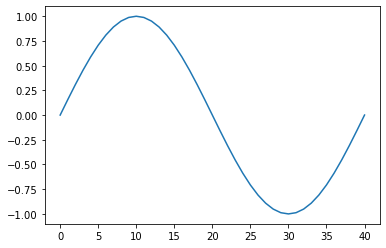

In [2]:
plt.plot(y[:41])
plt.show()

- 시간축 방향에서 일정 간격으로 샘플을 추출하여 이산 신호(discrete signal)로 변환시키는 과정을 표본화(Sampling)라고 부릅니다. 
- 아래 그래프는 1 사이클 동안 나타나는 이산시간 연속크기 신호를 한번 출력해보도록 하겠습니다.

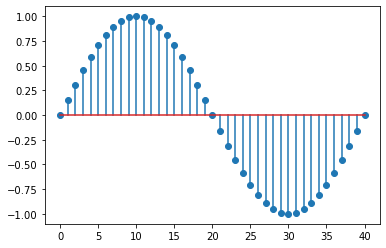

In [3]:
plt.stem(y[:41])
plt.show()

- 우리는 위에서 single_tone() 함수 구현시 sampling rate를 16000으로 지정하고, duration은 1초, 그리고 주파수는 400인 사인함수를 정의했습니다. 여기서 sampling rate는 무엇일까요? 초당 샘플링의 횟수를 말합니다. 샘플링이란? 1초의 연속적인 신호를 몇 개의 숫자로 나누는 표현할 것인지를 말합니다. 그렇다면 Sampling rate는 어떻게 설정하는 것이 좋을까요?

- 나이키스트-섀넌 표본화에 따라 Sampling rate가 결정되며, 일반적으로 사용되는 주파수 영역대는 16kHz, 44.1kHz를 많이 사용합니다. 16kHz는 보통 Speech에서 많이 사용되는 주파수 영역대이고, 44.1kHz는 Music에서 많이 사용하는 주파수영역대입니다. 우리는 음성데이터를 사용할 것이므로, sampling rate를16000(16k)으로 지정하겠습니다. duration은 지속시간을 나타내며, 단위는 초단위 입니다. 여기서 Hz는 주기가 일정하게 반복되는 횟수를 의미하며, 이를 주파수라고 칭합니다. 따라서 주파수의 단위는 Hz입니다.

### 나이키스트-섀넌 표본화에 따르면 Sampling rate는 어떻게 결정하라고 나와있나요?

- 아날로그를 디지털로 거친 후 디지털을 아날로그로 왜곡없이 복원하기 위해서는 표본화 된 최대 주파수가 2배보다 더 클 때 가능하다고 나와있습니다.

### 오디오(Music)에서는 왜 44.1kHz를 사용할까요? 위 그림의 주파수 영역을 참고해 설명해 보세요.

- 인간의 최대 가청 주파수가 20kHz이기 때문에 나이키스트-섀넌 표본화에 따라 40kHz의 Sampling frequency를 기준으로 잡는다. 
- 실제로는 추가적인 이유로 오디오 레코드에선 44.1kHz를 사용한다.

## 표본화, 양자화, 부호화
- 연속적인 아날로그 신호를 컴퓨터 입력으로 넣게 되면 표본화(Sampling), 양자화(Quantizing), 부호화(Encoding)을 거쳐 이진 디지털 신호(Binary Digital Signal)로 변화시켜 인식하게 됩니다. 아래 그림은 아날로그 오디오 신호를 표본화, 양자화하는 과정을 시각화하여 보여 줍니다.

- 위에서 설명한 바와 같이 아날로그 데이터에서 일정 간격으로 표본을 채취하는 방식으로 이산적 데이터를 구합니다. 그러나 디지털화를 위해서는 이산적 - 데이터의 값 자체가 소수점 아래로 무한히 정밀해질 수 없고, 일정 간격으로 값을 근사하여 구할 수밖에 없습니다. 이 과정을 양자화라고 합니다. 이 과정에서 원본 아날로그 데이터화의 차이가 발생하고 미세한 왜곡이 발생합니다. Sampling rate 가 클수록 이 기대 왜곡치가 작아져 원본에 가까운 형태로 변환됩니다.

- 그리고 마지막으로 부호화를 통해 표본화->양자화를 거친 원본 아날로그 수치가 최종적인 디지털 표현(0과 1로만 이루어진)을 얻게 됩니다.

## Wave data 분석
- 이제 오늘 만들어볼 음성인식 모델을 위한 학습데이터를 분석해 보겠습니다. 아래와 같이 환경을 구성한 후, 데이터 다운로드를 진행해 주세요.
- \$ mkdir -p ~/aiffel/speech_recognition/data
- \$ mkdir -p ~/aiffel/speech_recognition/models
- \$ wget http://bigfile.mail.naver.com/bigfileupload/downloadfid=8QbZaAIq1NKXFoMjK3YXaxbwF3YZKAUmKxgwaxulFAMqFCYwFog9FquwFvlHrMrpxg9KAtwFAt9K6K9F4udpx0oKxFvKxCoFq+vpo+0 -O speech_wav_8000.npz
- \$ mv speech_wav_8000.npz ~/aiffel/speech_recognition/data

- 이렇게 다운로드받은 waveform 형태의 데이터에 대해 좀더 자세한 정보를 정리해 봅시다.

## Wave 데이터 형식 뜯어보기
- Audio 데이터는 이미지 데이터보다 낮은 차원의 데이터를 다룹니다. 1개의 wav 파일은 1차원으로 이루어진 시계열 데이터입니다. 실제로는 여러 소리 파형이 합쳐진 복합파라고 보아야 합니다.

## 간단한 단어 인식을 위한 훈련데이터셋
- 짧은 단어의 라벨이 달려 있어, 음성들을 텍스트로 구분하는 모델 혹은 간단한 명령어를 구별하는 모델로도 학습이 가능합니다.

## Bits per sample
- 샘플 하나마다 소리의 세기를 몇 비트로 저장했는지를 나타냅니다.
- 값이 커질 수록 세기를 정확하게 저장할 수 있습니다.
- 예를 들어, Bits rate가 16 bits 라면, 소리의 세기를 2^16, 즉 65,536 단계로 표현할 수 있습니다.
- 4 bits / 8 bits unsigned int / 16 bits int / 24 bits / 32 bits float 등의 자료형으로 표현됩니다.

## Sampling frequency
- 샘플링 주파수라는 단어입니다. 소리로부터 초당 샘플링한 횟수를 의미합니다.
- 샘플링은 원래 신호를 다시 복원할 수 있는 나이퀴스트(Nyquist) 샘플링 룰에 따라서, 복원해야 할 신호 주파수의 2배 이상으로 샘플링 해야합니다.
- 가청 주파수 20 ~ 24 kHz를 복원하기 위해 사용하며, 음원에서 많이 쓰이는 값은 44.1 kHz입니다.

## Channel
- 각 채널별로 샘플링된 데이터가 따로 저장되어 있습니다.
- 2채널(Stereo) 음원을 재생하면 왼쪽(L)과 오른쪽(R) 스피커에 다른 값이 출력됩니다.
- 1채널(Mono) 음원의 경우 왼쪽(L) 데이터만 있으며, 재생시엔 왼쪽(L)과 오른쪽(R) 스피커에 같은 값이 출력됩니다.

- 1000 Hz 신호를 저장한 wav 파일입니다.
- Sample rate 는 48000 Hz, 즉 1초 재생하는데 필요한 Sample 수는 48000개입니다.
- 모든 샘플은 -1 ~ 1 사이의 정해진 bits per sample의 값으로 표현됩니다.

In [4]:
import numpy as np
import os

data_path = os.getenv("HOME")+'/aiffel/speech_recognition/data/speech_wav_8000.npz'
speech_data = np.load(data_path)

## 데이터셋 살펴보기
- npz 파일로 이뤄진 데이터이며, 각각 데이터는 "wav_vals", "label_vals"로 저장되어있습니다.


In [5]:
print("Wave data shape : ", speech_data["wav_vals"].shape)
print("Label data shape : ", speech_data["label_vals"].shape)

Wave data shape :  (50620, 8000)
Label data shape :  (50620, 1)


- 데이터셋은 1초 길이의 오디오 음성데이터 50620개로 이뤄져 있습니다.
- 주어진 데이터의 원래 Sample rate는 16000이지만, 8000으로 re-sampling해 사용하겠습니다.
- 모두 1초의 길이를 가지는 오디오 음성데이터이여서 각각 8000개의 sample data를 가지고 있습니다.
- 데이터셋은 캐글의 음성 인식 챌린지의 데이터입니다. Kaggle/TensorFlow Speech Recognition Challenge. This is version 0.01 of the data set containing 64,727 audio files, released on August 3rd 2017.
- 위에서 설명한 데이터가 맞는지 확인해봅시다.

In [6]:
import IPython.display as ipd
import random

# 데이터 선택
rand = random.randint(0, len(speech_data["wav_vals"]))
print("rand num : ", rand)

sr = 8000 # 1초동안 재생되는 샘플의 갯수
data = speech_data["wav_vals"][rand]
print("Wave data shape : ", data.shape)
print("label : ", speech_data["label_vals"][rand])

ipd.Audio(data, rate=sr)

rand num :  41605
Wave data shape :  (8000,)
label :  ['yes']


# Train/Test 데이터셋 구성하기
## Label data 처리
- 현재 단어의 정답은 Text 형태로 이뤄져있습니다. 학습을 위해서는 Text 데이터를 학습가능한 형태로 만들어줘야 합니다.

- 아래는 구분해야할 label 목록입니다.

- ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go' ]

- 이외 데이터들은 'unknown', 'silence'로 분류되어 있습니다.

In [7]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

label_value = target_list
label_value.append('unknown')
label_value.append('silence')

new_label_value = dict()
for i, l in enumerate(label_value):
    new_label_value[l] = i
label_value = new_label_value

- Text 이루어진 데이터를 학습에 사용하기 위해서 index 형태로 바꿔주는 작업을 하겠습니다.
- int로 이뤄진 index 작업을 통해서 Label data를 더 쉽게 사용할 수 있습니다.

In [8]:
temp = []
for v in speech_data["label_vals"]:
    temp.append(label_value[v[0]])
label_data = np.array(temp)

# 학습을 위한 데이터 분리
- sklearn의 train_test_split 함수를 이용해 train data와 test data를 분리하겠습니다.
- test_size의 인자를 조절해주면, 설정해 준 값만큼 Test dataset의 비율을 조정할 수 있습니다.

In [9]:
from sklearn.model_selection import train_test_split

sr = 8000
train_wav, test_wav, train_label, test_label = train_test_split(speech_data["wav_vals"], 
                                                                label_data, 
                                                                test_size=0.1,
                                                                shuffle=True)
print(train_wav)

train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])

[[ 6.17920049e-03  9.25340690e-03  4.22761962e-03 ... -1.51893753e-03
  -1.86487171e-03 -6.03111275e-03]
 [-1.96946994e-03 -5.82756754e-03 -9.09047108e-03 ... -1.61899328e-02
  -1.26549695e-02 -1.12590631e-02]
 [ 1.80621028e-05  5.36097250e-05 -2.97887254e-05 ...  9.36243214e-06
   1.04781166e-05  1.04834789e-05]
 ...
 [-3.39425664e-04 -4.06243256e-04 -5.81315719e-04 ...  6.97191898e-03
   2.87422840e-03 -9.53527354e-03]
 [-1.61711685e-03 -2.77453754e-03 -2.61957874e-03 ...  2.57283868e-03
   2.62167957e-03  2.72851670e-03]
 [ 4.01978206e-04  5.64602029e-04  2.03398522e-04 ...  5.22681221e-04
   4.48623585e-04  9.10603208e-04]]


나눠진 데이터셋을 확인해 보겠습니다.

In [10]:
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)

train data :  (45558, 8000, 1)
train labels :  (45558,)
test data :  (5062, 8000, 1)
test labels :  (5062,)


# Hyper-parameters setting
- 학습을 위한 하이퍼파라미터를 설정해줍니다.모델 체크포인트 저장을 위한 체크포인트의 경로를 설정해줍니다.
- 후에 모델 체크포인트 Callback 함수를 설정하거나, 모델을 불러올때 사용합니다.



In [11]:
batch_size = 128
max_epochs = 20

# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/speech_recognition/models/wav'

checkpoint_dir

'/home/aiffel0042/aiffel/speech_recognition/models/wav'

# Data setting
- tf.data.Dataset을 이용해서 데이터셋을 구성해주겠습니다.
- from_tensor_slices 함수에 return 받길 원하는 데이터를 튜플 (data, label) 형태로 넣어서 사용할 수 있습니다.

- map 함수는 dataset이 데이터를 불러올때마다 동작해주는 일종의 데이터 전처리 함수입니다.
- 첫번째 map 함수는 from_tensor_slice 에 입력한 튜플 형태로 데이터를 받으며 return 값으로 어떤 데이터를 반환할지 결정합니다.
- map 함수는 중첩해서 사용이 가능합니다.

In [12]:
def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label

## tf.data.Dataset 함수를 구성하겠습니다.
- batch는 dataset에서 제공하는 튜플 형태의 데이터를 얼마나 가져올지 결정하는 함수입니다.


In [13]:
import tensorflow as tf

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>


# Wave classification 모델 구현
## Model
- Audio 데이터는 1차원 데이터이기 때문에 데이터 형식에 맞도록 모델을 구성해주어야 합니다.
- Conv1D layer를 이용해서 모델을 구성해보겠습니다.
- Conv, batch norm, dropout, dense layer 등을 이용해 모델을 구성해보도록 하죠.

In [14]:
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8000, 32)          320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8000, 32)          9248      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4000, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          18496     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4000, 64)          36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 64)         

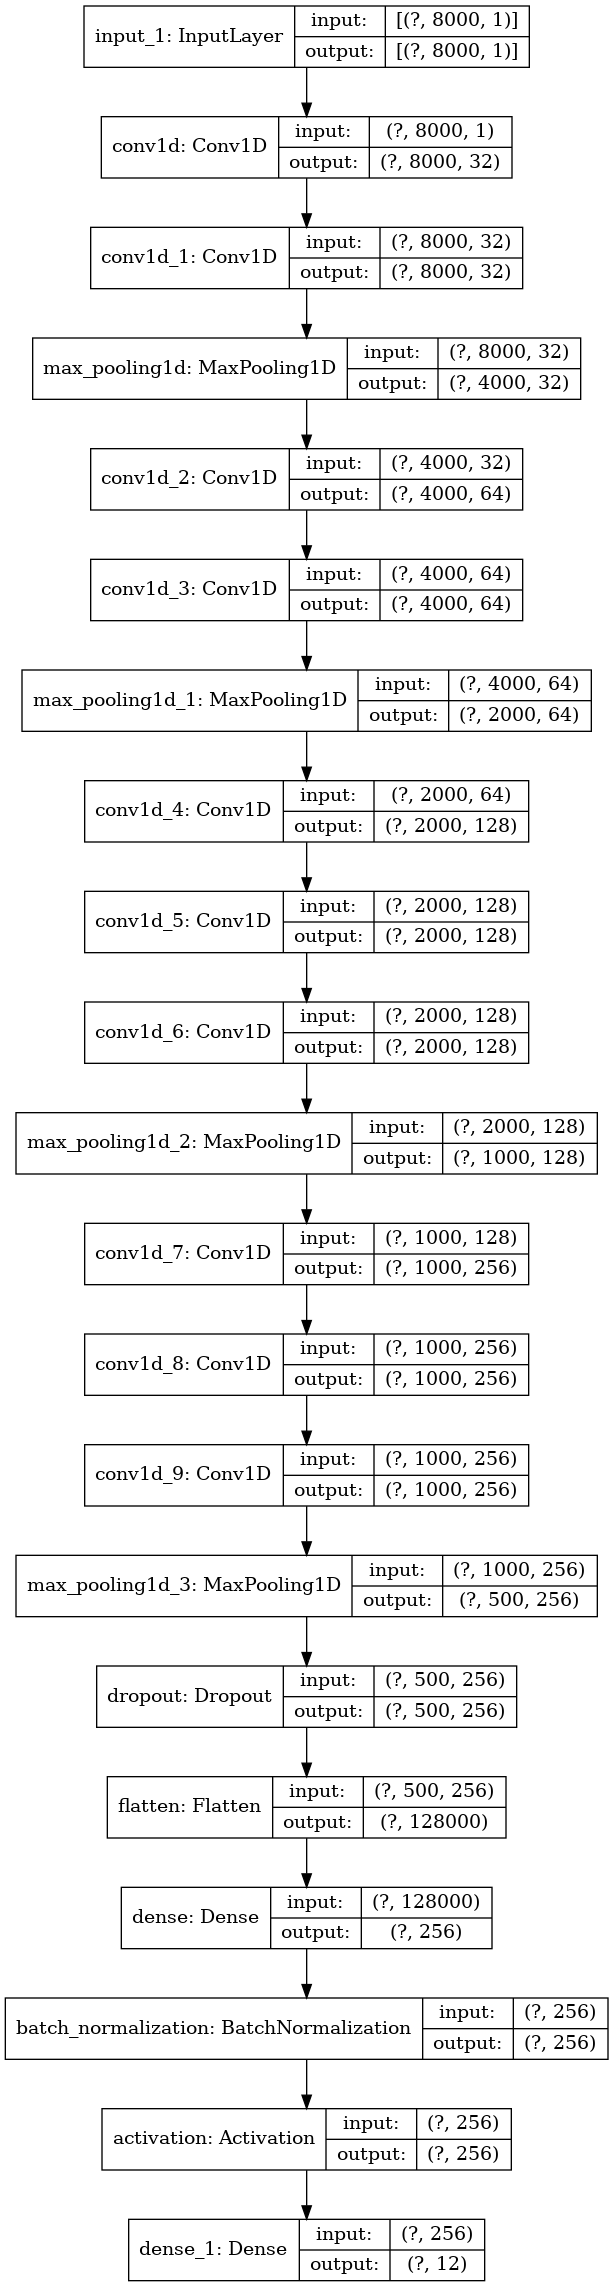

In [15]:
tf.keras.utils.plot_model(model_wav, './Wav.png', show_shapes=True)

# Loss
- 현재 라벨이 될 수 있는 12개의 단어 class를 가지고 있습니다.
- 해당 class를 구분하기 위해서는 multi-class classification이 필요하며, 이를 수행하기 위한 Loss로 Categorical Cross-Entropy loss를 사용하겠습니다.



In [16]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

# Training
## Callback
- model.fit 함수를 이용할 때, callback 함수를 이용해서 학습 중간 중간 원하는 동작을 하도록 설정할 수 있습니다.
- 모델을 재사용하기위해서 모델 가중치를 저장하는 callback 함수를 추가해보겠습니다.
- Model Checkpoint callback은 모델을 학습을 진행하며, fit 함수내 다양한 인자를 지정해 모니터하며 동작하게 설정할 수 있습니다.
- 현재 모델은 validation loss를 모니터하며, loss가 낮아지면 모델 파라미터를 저장하도록 구성되어 있습니다.

In [17]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

In [66]:
#30분 내외 소요
history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/2
711/711 [==============================] - ETA: 0s - loss: 1.4188 - accuracy: 0.5288
Epoch 00001: val_loss improved from inf to 0.98093, saving model to /home/aiffel0042/aiffel/speech_recognition/models/wav
711/711 [==============================] - 134s 188ms/step - loss: 1.4188 - accuracy: 0.5288 - val_loss: 0.9809 - val_accuracy: 0.6873
Epoch 2/2
711/711 [==============================] - ETA: 0s - loss: 0.8116 - accuracy: 0.7518
Epoch 00002: val_loss improved from 0.98093 to 0.70134, saving model to /home/aiffel0042/aiffel/speech_recognition/models/wav
711/711 [==============================] - 135s 190ms/step - loss: 0.8116 - accuracy: 0.7518 - val_loss: 0.7013 - val_accuracy: 0.7890


# 학습 결과 Plot
- model.fit 함수는 학습 동안의 결과를 return해줍니다.
- return 값을 기반으로 loss와 accuracy를 그래프로 표현하겠습니다.
- fit 함수에서 전달 받은 Loss와 Accuracy의 값을 이용해 모델이 어떻게 학습되고 있는지 볼 수 있습니다.
- train loss와 val_loss의 차이가 커지는 경우 오버피팅이 일어나는 것이기 때문에 이를 수정할 필요가 있습니다.

- 출력된 그래프를 기반으로 모델의 학습이 어떻게 진행됐는지 확인해볼 수 있습니다.

In [18]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history_wav' is not defined

# Evaluation
- Test dataset을 이용해서 모델의 성능을 평가합니다.

- 실습삼아 checkpoint callback 함수가 저장한 weight를 다시 불러와서 테스트 준비를 해보겠습니다.

In [68]:
model_wav.load_weights(checkpoint_dir)

- Test data을 이용하여 모델의 예측값과 실제값이 얼마나 일치하는지 확인하겠습니다.

In [69]:
results = model_wav.evaluate(test_dataset)

80/80 [==============================] - 8s 98ms/step - loss: 0.7010 - accuracy: 0.7890


In [70]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.701
accuracy value: 78.9016%


# Model Test
- Test data 셋을 골라 직접 들어보고 모델의 예측이 맞는지 확인해보아요.



In [71]:
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  off


In [72]:
if np.argmax(y_pred_) == test_label[i]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))

y_pred: off


# Skip-Connection model을 추가해보자
## Skip-Connection model 구현
- 이전 스텝에서 우리는 Conv1D 기반의 간단한 분류 모델을 구현해서 학습 및 테스트를 진행해 보았습니다. 간단한 모델임에도 정확도가 나쁘지 않았을 것입니다.

- 하지만 여러분들은 이미지처리 모델을 다루면서 ResNet 등 skip-connection을 활용한 모델들이 훨씬 안정적으로 높은 성능을 낼 수 있음을 배워왔을 것입니다. 그렇다면 이번 음성처리 모델에 적용해도 비슷한 개선 효과를 낼 수 있지 않을까요?

- 기존의 모델을 skip-connection이 추가된 모델로 변경해 학습을 진행해보겠습니다.

![titla](skip-connection.max-800x600.png)

- 그림에서 보듯이 위쪽의 데이터가 레이어를 뛰어넘어 레이어를 통과한 값에 더해주는 형식으로 구현됨을 확인할 수 있습니다.
- Concat을 이용한 방식으로 구현하면 됩니다.

- tf.concat([#layer output tensor, layer output tensor#], axis=#)

- 우리가 사용하는 데이터가 1차원 audio 데이터이기 때문에 1차원 데이터를 처리하는 모델을 구성해보겠습니다.

In [19]:
input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav_skip = tf.keras.Model(input_tensor, output_tensor)

model_wav_skip.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 8000, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 8000, 32)     9248        conv1d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 4000, 32)     0           conv1d_11[0][0]                  
_______________________________________________________________________________________

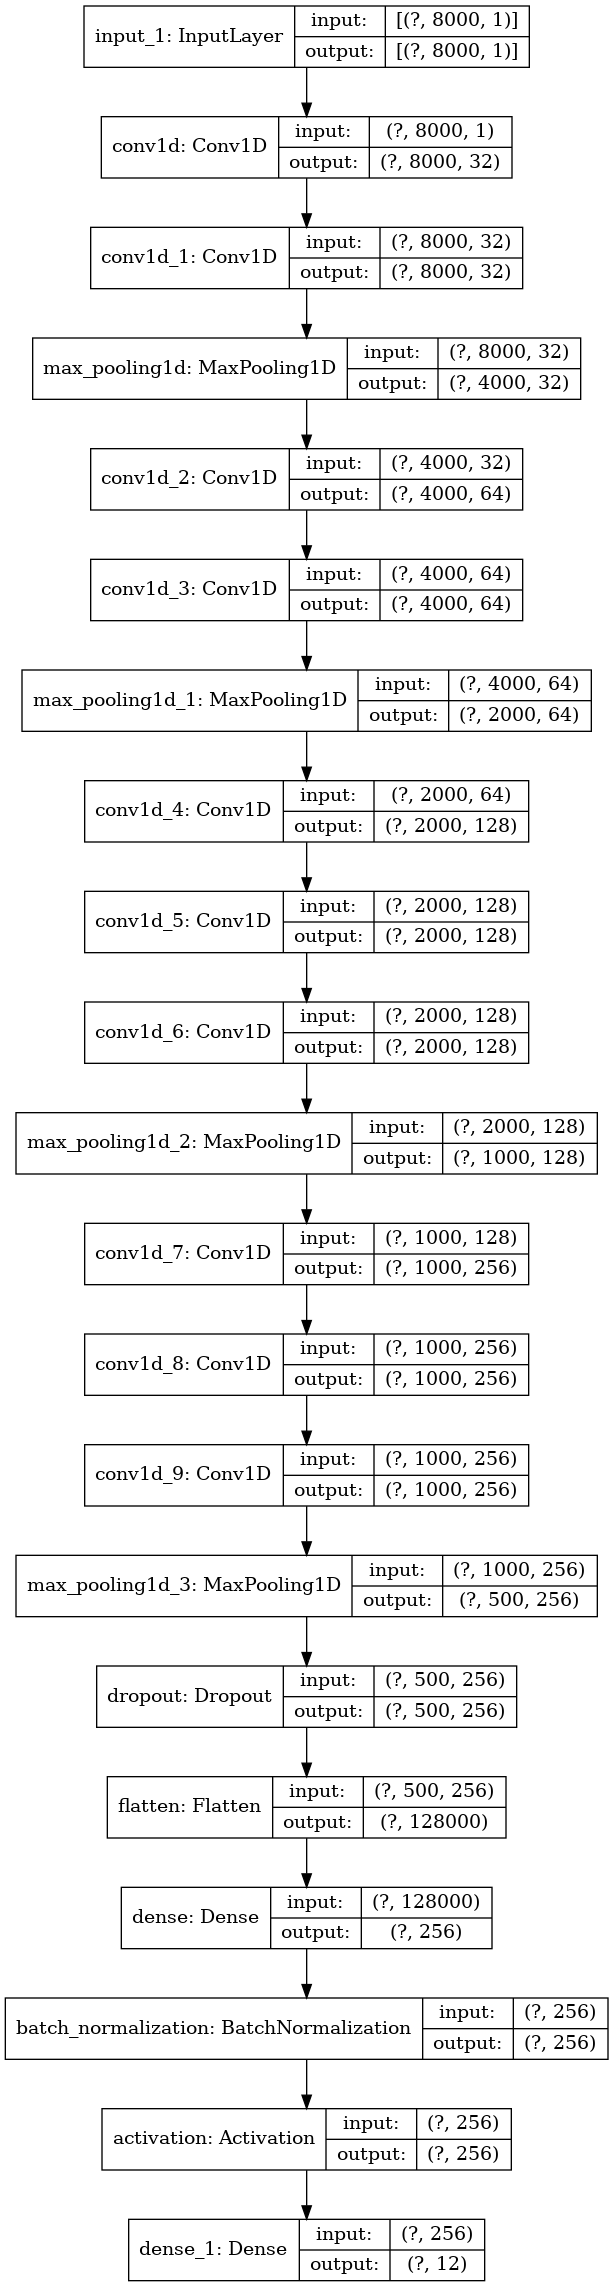

In [20]:
tf.keras.utils.plot_model(model_wav, './Wav_New.png', show_shapes=True)

- 모델 구성만 달라졌을 뿐, 그 외 Task구성이나 데이터셋 구성, 훈련 과정은 동일합니다.

In [21]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav_skip.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

In [22]:
# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/speech_recognition/models/wav_skip'

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

In [ ]:
#30분 내외 소요
history_wav_skip = model_wav_skip.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/2
711/711 [==============================] - ETA: 0s - loss: 1.2449 - accuracy: 0.5990
Epoch 00001: val_loss improved from inf to 0.81143, saving model to /home/aiffel0042/aiffel/speech_recognition/models/wav_skip
711/711 [==============================] - 162s 228ms/step - loss: 1.2449 - accuracy: 0.5990 - val_loss: 0.8114 - val_accuracy: 0.7567
Epoch 2/2
444/711 [=================>............] - ETA: 57s - loss: 0.7240 - accuracy: 0.7869

- 학습결과의 시각화 및 evaluation 과정도 동일합니다.

In [ ]:
import matplotlib.pyplot as plt

acc = history_wav_skip.history['accuracy']
val_acc = history_wav_skip.history['val_accuracy']

loss=history_wav_skip.history['loss']
val_loss=history_wav_skip.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluation 

model_wav_skip.load_weights(checkpoint_dir)
results = model_wav_skip.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

In [ ]:
# Test 

inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav_skip(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

In [ ]:
if np.argmax(y_pred_) == test_label[i]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))

# Spectrogram
우리는 지금까지 음성 데이터를 1차원 시계열 데이터로 해석하는 waveform 해석을 통해 다루어 왔습니다.

그러나 우리가 다루는 waveform은 실은 많은 음원의 파형이 합성된 복합파라는 것을 앞서 언급했습니다. 그렇다면 보다 뚜렷이 다양한 파형들을 그 주파수 대역별로 나누어 별도로 해석해볼 수 있는 방법은 없을까요? 이제 우리가 자주 들었던 푸리에 변환(Fourier transform)을 언급할 때가 된 것 같습니다.

## 푸리에변환 (Fourier transform)
임의의 입력 신호를 다양한 주파수를 갖는 주기함수 (복수 지수함수)들이 합으로 분해하여 표현하는 것을 말합니다. 수식으로 말하면 아래와 같습니다.

![title](Fourier_Transform.png)

그러나 보다 직관적인 이해는 아래 그림을 참고하는 것이 좋겠습니다. 위 수식과 아래 그림의 의미는 같습니다.

![title](E-23-08.png)

## 조금 더 깊이 들어가는 푸리에 변환
조금만 더 이론적으로 들어가 봅시다. 아래 내용은 꼭 이해하지 못해도 좋습니다.

## 오일러 공식 (지수함수와 주기함수와의 관계)

![title](Eulers_formula.png)

푸리에 변환이 끝나면, 이제 실수부와 허수부를 가지는 복소수가 얻어집니다. 이러한 복소수의 절대값은 Spectrum magnitude (주파수의 강도)라고 부르며, 복소수가 가지는 phase는 phase spectrum(주파수의 위상)이라고 부르게 됩니다.

![title](E-23-10.max-800x600.png)

![title](Eulers_formula1.png)

## STFT(Short Time Fourier Transform)
- FFT는 시간에 흐름에 따라 신호의 주파수가 변했을 때, 어느 시간대에 주파수가 변하는지 모르게 됩니다. 이러한 한계를 극복하기 위해서, STFT는 시간의 길이를 나눠서 퓨리에 변환을 하게 됩니다.

![title](STFT.png)

- N은 FFT size 이고, Window를 얼마나 많은 주파수 밴드로 나누는 가를 의미합니다.
- Duration은 sampling rate를 window로 나눈 값입니다. T=window/sampling rate. duration은 신호주기보다 5배이상 길게 잡아야합니다. T(window)=5T(Signal). 예를 들어 440Hz신호의 window size는 5*(1/440)이 됩니다.
- ω(n)는 window 함수를 나타냅니다. 일반적으로는 hann window가 많이 쓰입니다.
- n는 window size입니다. window 함수에 들어가는 sample의 양입니다. n이 작을 수록 low-frequency resolution을 가지게 되고, high-- - time resolution을 가지게 되고, n이 길수록 high-frequency를 가지고 되고 low-time resolution을 가지게 됩니다.
- H는 hop size를 의미합니다. 윈도우가 겹치는 사이즈입니다. 일반적으로는 1/4정도를 겹치게 합니다.
- STFT의 결과는 즉 시간의 흐름에 따른 frequency영역별 Amplitude를 반환합니다.

![title](E-23-11.png)

## Spectrogram이란?
- wav 데이터를 해석하는 방법 중 하나로, 일정 시간동안 wav 데이터 안의 다양한 주파수들이 얼마나 포함되어 있는 지를 보여줍니다.
- 이 Spectrogram을 그리는 방법이 바로 위에 소개한 STFT 입니다.

![title](spectogram.max-800x600.png)

- X축은 시간, Y축은 주파수를 나타내며, 해당 시간/주파수에서의 음파 강도에 따라 밝은색으로 표현됩니다.
- wav 데이터가 단위 시간만큼 Short Time Fourier Transform을 진행해 매 순간의 주파수 데이터들을 얻어서 Spectrogram을 완성합니다.

- Step2에서 사용한 샘플데이터를 이용하여 스펙트로그램을 생성해 봅시다.

- 먼저 파이썬에서 제공하는 FFT 관련 라이브러리인 librosa를 설치합니다.

- \$ pip install librosa

In [27]:
import librosa

def wav2spec(wav, fft_size=258): # spectrogram shape을 맞추기위해서 size 변형
    D = np.abs(librosa.stft(wav, n_fft=fft_size))
    return D

In [28]:
# 위에서 뽑았던 sample data
spec = wav2spec(data)

In [29]:
print("Waveform shape : ",data.shape)

Waveform shape :  (8000,)


In [30]:
print("Spectrogram shape : ",spec.shape)

Spectrogram shape :  (130, 126)


- 어떻습니까? 1차원의 Waveform 데이터가 2차원의 Spectrogram 데이터로 변환되었습니다.

- 그렇다면 방금 변환된 Spectrogram을 출력해보겠습니다.

- 만약에, 우리가 Waveform 데이터 대신 이 Spectrogram 포맷으로 모든 음성 데이터를 변환한 후 음성인식 모델을 학습시킨다면, 과연 Waveform과 비교했을 때 더 나은 성능을 기대할 수 있을까요?

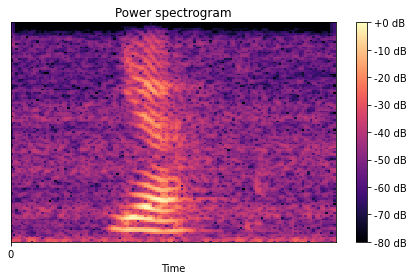

In [31]:
import librosa.display

librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

# 프로젝트: Spectrogram classification 모델 구현
- 그래서 오늘은 방금 든 궁금증을 해결해 보는 것으로 프로젝트를 진행해 봅니다.

- 오늘 실습에서 1차원 Waveform 데이터를 입력받아 Text 라벨을 출력하는 모델을 기본 버전과 Skip-connection 버전으로 나누어 학습시켜 보았습니다. 이번에는 2차원 Spectrogram 데이터를 입력받아 위 모델과 동일한 역할을 수행하는 모델을 아래 제시된 단계와 같이 수행해 보시기 바랍니다. 이번에도 마찬가지로 기본 버전과 Skip-connection 버전으로 나누어 각각 진행해 보시기 바랍니다.
- 모델 구조를 제외하고는 실습에서 제시된 것과 거의 동일하게 진행될 것입니다.

# 1. 데이터 처리와 분류

- 라벨 데이터 처리하기
- sklearn의 rain_test_split함수를 이용하여 train, test 분리

# 2. 학습을 위한 하이퍼파라미터 설정

# 3. 데이터셋 구성

- tf.data.Dataset을 이용
- from_tensor_slices 함수에 return 받길 원하는 데이터를 튜플 (data, label) 형태로 넣어서 사용
- map과 batch를 이용한 데이터 전처리

# 4. 2차원 Spectrogram 데이터를 처리하는 모델 구성

- Conv2D layer, batchnorm, dropout, dense layer 등을 이용
- 12개의 단어 class를 구분하는 loss를 사용하고 Adam optimizer를 사용
- 모델 가중치를 저장하는 checkpoint callback 함수 추가

# 5. 학습 후, 학습이 어떻게 진행됐는지 그래프로 출력

- loss, accuracy를 그래프로 표현

# 6. Test dataset을 이용해서 모델의 성능을 평가

- 저장한 weight 불러오기
- 모델의 예측값과 정답값이 얼마나 일치하는지 확인